## AccelerateAI - Time Series Analysis and Forecasting

### Visualizing Time Series data 

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Have a list of tech stock tickers
energy_df = pd.read_csv('DE_renewable.csv', index_col=0, parse_dates=True)
energy_df.shape

(50400, 3)

In [106]:
#Hourly energy production and consumption
energy_df.head()

,DE_load_actual,DE_solar_generation,DE_wind_generation
utc_timestamp,,,
2015-01-01 00:00:00+00:00,41151,NaN,8852.0
2015-01-01 01:00:00+00:00,40135,NaN,9054.0
2015-01-01 02:00:00+00:00,39106,NaN,9070.0
2015-01-01 03:00:00+00:00,38765,NaN,9163.0
2015-01-01 04:00:00+00:00,38941,NaN,9231.0


In [107]:
# Add columns with year, month, and weekday name
energy_df['Year'] = energy_df.index.year
energy_df['Month'] = energy_df.index.month
energy_df['Weekday'] = energy_df.index.weekday

#Check
energy_df.sample(5, random_state=0)

,DE_load_actual,DE_solar_generation,DE_wind_generation,Year,Month,Weekday
utc_timestamp,,,,,,
2018-03-24 22:00:00+00:00,48471,0.0,2984.0,2018,3,5
2017-12-16 08:00:00+00:00,59920,1092.0,9774.0,2017,12,5
2016-11-24 20:00:00+00:00,62409,0.0,11462.0,2016,11,3
2017-10-25 05:00:00+00:00,67699,1.0,19118.0,2017,10,2
2019-10-04 06:00:00+00:00,56516,1591.0,9681.0,2019,10,4


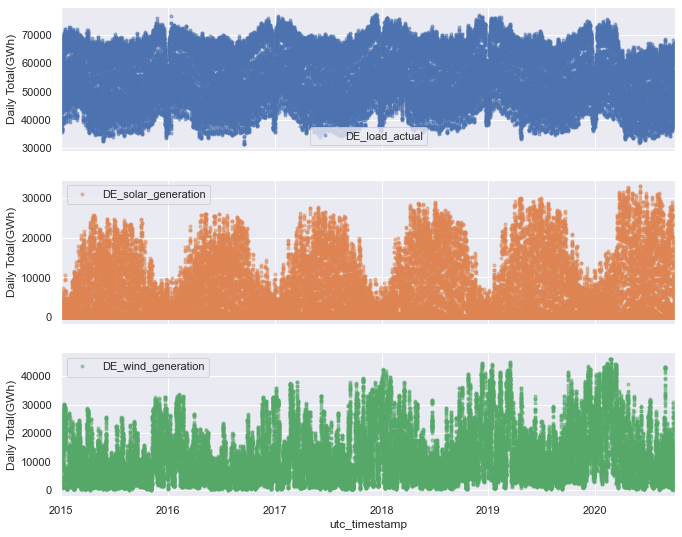

In [108]:
colnames = ['DE_load_actual', 'DE_solar_generation', 'DE_wind_generation']
axes = energy_df[colnames].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Total(GWh)')

### Resample data to have a better overall view

In [109]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['DE_load_actual', 'DE_solar_generation', 'DE_wind_generation']

# Resample to weekly frequency, aggregating with mean
energy_weekly = energy_df[data_columns].resample('W').mean()
energy_weekly.head(3)

,DE_load_actual,DE_solar_generation,DE_wind_generation
utc_timestamp,,,
2015-01-04 00:00:00+00:00,47233.739583,585.101124,18507.260417
2015-01-11 00:00:00+00:00,56191.101190,787.077381,17309.958333
2015-01-18 00:00:00+00:00,57672.678571,1024.113095,15602.815476


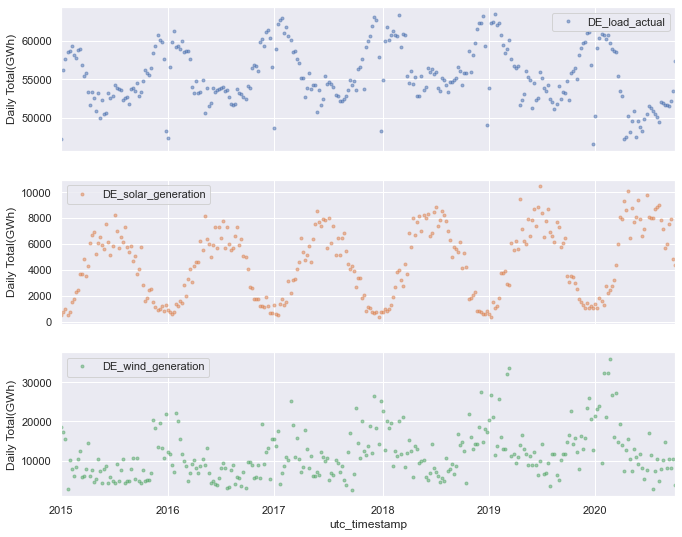

In [110]:
colnames = ['DE_load_actual', 'DE_solar_generation', 'DE_wind_generation']
axes = energy_weekly[colnames].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Total(GWh)')

### Seasonality in the data

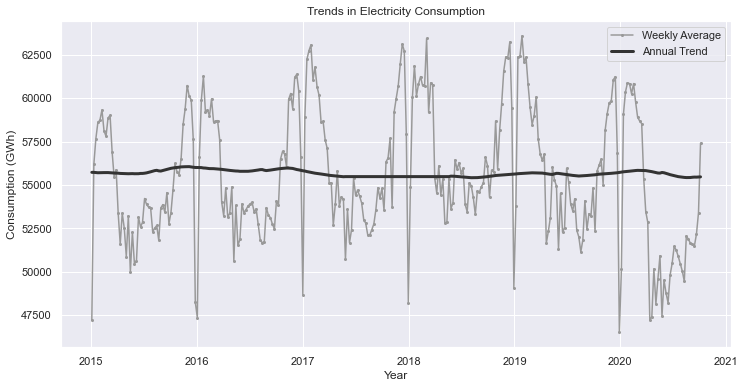

In [111]:
energy_365d = energy_weekly[data_columns].rolling(window=352, center=True, min_periods=52).mean()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(energy_weekly['DE_load_actual'], marker='o', markersize=2, color='0.6',linestyle='-', label='Weekly Average')
ax.plot(energy_365d['DE_load_actual'], color='0.2', linewidth=3, label='Annual Trend')

# Set x-ticks to yearly interval and add legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

Observation:
- The 7-day rolling mean reveals that electricity consumption is typically higher in winter and lower in summer
- Also there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.
- The 365-day rolling mean(Annual Trend), shows that the long-term trend in electricity consumption is pretty flat

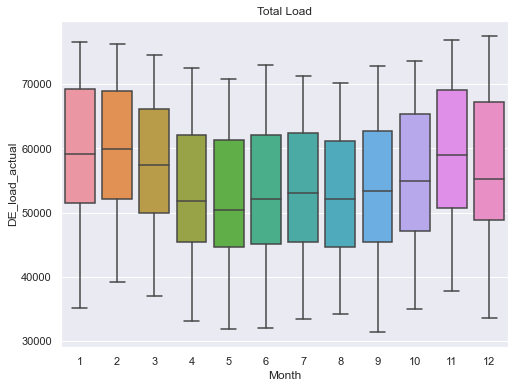

In [112]:
sns.boxplot(data=energy_df, x='Month', y='DE_load_actual').set(title="Total Load")
sns.set(rc={'figure.figsize':(8,6)})

 Observation: 
- Electricity consumption is generally higher in winter and lower in summer, 
- the median and lower two quartiles are lower in December and January compared to neighbouring months, due to holidays

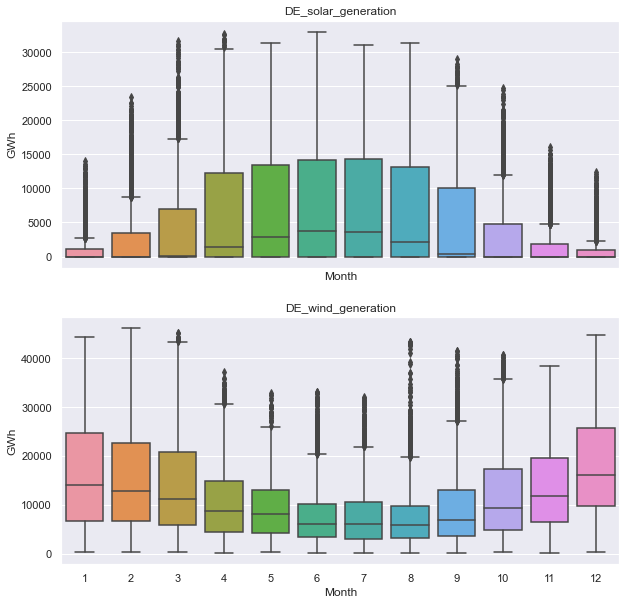

In [113]:
# Seasonality in Energy Production
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
for name, ax in zip(['DE_solar_generation', 'DE_wind_generation'], axes):
    sns.boxplot(data=energy_df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

Observation:
- Solar production goes higher in summer and reduced to almost zero durign winter.
- Wind power is the opposite of solar, and makes up the loss during winter season.

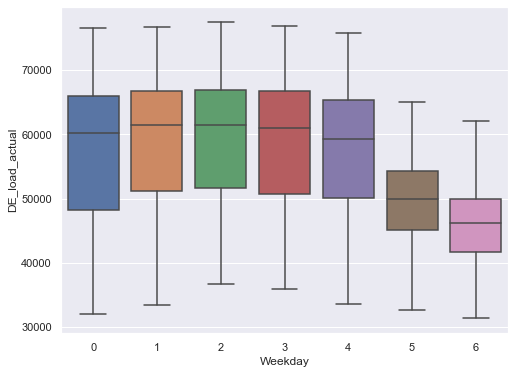

In [114]:
# Seasonality of consumption during the week
sns.boxplot(data=energy_df, x='Weekday', y='DE_load_actual');

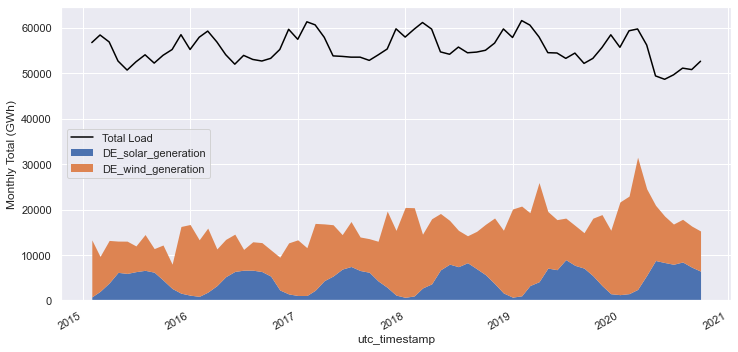

In [115]:
# Consumption vs Production

# Resample to weekly frequency, aggregating with mean
data_columns = ['DE_load_actual', 'DE_solar_generation', 'DE_wind_generation']
energy_monthly = energy_df[data_columns].resample('M').mean()

fig, ax = plt.subplots(figsize=(12, 6))
#line plot
ax.plot(energy_monthly['DE_load_actual'], color='black', label='Total Load')
energy_monthly[['DE_solar_generation', 'DE_wind_generation']].plot.area(ax=ax, linewidth=0)

#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

Observation:
- The electricity consumption has been fairly stable over time
- While wind power production has been growing steadily, solar power production has been flat with very high seasonality

## Interactive Plotting

In [128]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Bar(x=list(energy_monthly.index), y=list(energy_monthly.DE_wind_generation)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

# ***